In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_csv("tvmarketing.csv")
df.head(10)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,10.6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
df.corr()


,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [9]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<AxesSubplot:title={'center':' Reklam Bütçesi ile Satış Dağılımı '}, xlabel='TV Reklam Bütçesi', ylabel='Satış Sayısı'>

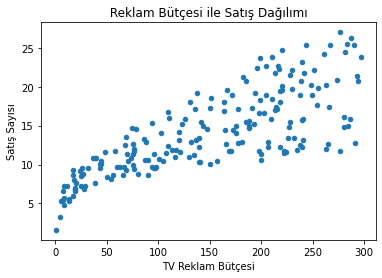

In [10]:
#basit bir scatter grafiği ile değerlerin korelasyonuna baktım
df.plot(x='TV', xlabel="TV Reklam Bütçesi", y='Sales', ylabel= "Satış Sayısı", kind='scatter', title=" Reklam Bütçesi ile Satış Dağılımı ")


In [11]:
#scikit learn kitaplığından train_test_split ile öğrenme modelimizi kuruyoruz 
#verinin %50'sini modelin eğitimi için kullanıyoruz 
x=df["TV"]
y=df["Sales"]
from sklearn.model_selection import train_test_split
x_egit, x_test, y_egit, y_test = train_test_split(x,y, train_size=0.5 , random_state=42)

In [12]:
print(x_egit.shape)
print(y_egit.shape)
print(x_test.shape)
print(y_test.shape)

(100,)
(100,)
(100,)
(100,)


In [13]:
#Scikit-learn'de gözlemlerin satır, özelliklerin ise sütun olduğu genel bir kuraldır.
#Aşağıda yapılan işlem yalnızca tek bir özelliği kullanırken gereklidir; bu durumda tek özellik 'TV' sütünudur.

import numpy as np
#basitçe, numpy.newaxis var olan array'in boyutunu 1 boyut artırmak için kullanılabilir.
x_egit = x_egit[:, np.newaxis]
x_test = x_test[:, np.newaxis]

C:\Users\MuhammedMelihYıldız\AppData\Local\Temp\ipykernel_2972\3895362396.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_egit = x_egit[:, np.newaxis]
C:\Users\MuhammedMelihYıldız\AppData\Local\Temp\ipykernel_2972\3895362396.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test = x_test[:, np.newaxis]


In [14]:
print(x_egit.shape)
print(y_egit.shape)
print(x_test.shape)
print(y_test.shape)

(100, 1)
(100,)
(100, 1)
(100,)


In [11]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# lr adında bir obje açıp lineer regresyon modelini bu obje üzerinden kullanıyoruz
lr = LinearRegression()

# modele eğitmek için lr.fit() komutunu kullanıyoruz
lr.fit(x_egit, y_egit)

LinearRegression()

In [12]:
# Kesişme noktasını ve katsayıları yazdır
print(lr.intercept_)
print(lr.coef_)       

7.04284050188448
[0.04729463]


In [13]:
#eğittiğimiz veriden tahmin değeri çıkarıyoruz
y_pred = lr.predict(x_test)
type(y_pred)

numpy.ndarray

Text(0, 0.5, 'Sales')

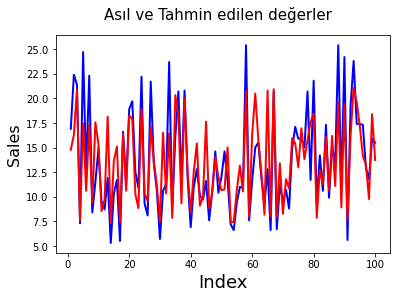

In [14]:
# Asıl ve Tahmin edilen değerlerin karşılaştırılması
import matplotlib.pyplot as plt
c = [i for i in range(1,101,1)]         # girdileri oluşturmak 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Asıl ve Tahmin edilen değerler', fontsize=15)              # Plot başlığı
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

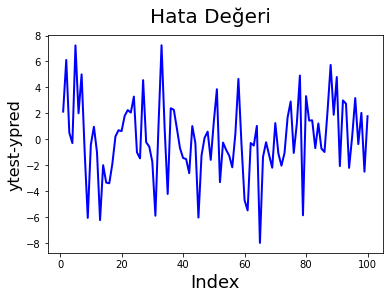

In [20]:
#hata değeri tablosu oluşturma
c = [i for i in range(1,101,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Hata Değeri', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [17]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 8.51446518907273
r_square_value : 0.6744198913043723


In [18]:
# bu mse =8.51, bu modelin yüzde 8.51'lik değerleri karşılayamadığı anlamına gelir
#Bir MSE değeri olarak 8.51, modelinizin tahminlerinin gerçek değerlere göre ortalama olarak 
#yaklaşık olarak 8.51 birim uzaklıkta olduğu anlamına gelir.
# r2, modelinizin test verilerinde %67 doğru olduğu anlamına gelir.

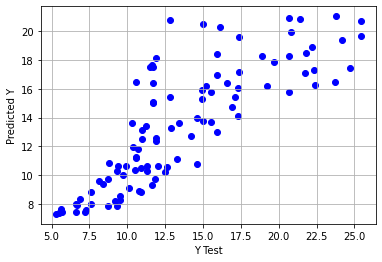

In [19]:
#asıl ve tahmin edilen değerlerin grafiğe yansımış hali
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()